### Import libraries and packages

In [1]:
# MODEL
from sentence_transformers import SentenceTransformer, util

# DATA CLEANING
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

# VISUALIZATION
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### Initialize the transformation model

In [2]:
# import the model
model = SentenceTransformer('stsb-roberta-large')

### Read the data

In [3]:
# read the data
data = pd.read_csv('depression.csv')
data.head()

,user_ID,followers_count,user_location,user_description,date,text,hashtags
0,1.390000e+18,53,"Barcelona, Spain","For 34 years, Psych Congress has served as a u...",10/27/2021 11:45,Extended abstract submission deadline is TODAY...,NaN
1,2.350451e+09,30626,"Sacramento, California",Believer in creating a healthy game plan to fe...,10/27/2021 11:39,"🌟This Fall and if you can, intentionally spend...",['anxiety']
2,3.345540e+09,829,"Pittsburgh, PA","Founder Motivation Champs, Publisher 📚, Screen...",10/27/2021 11:38,Proud to welcome Stephanie Kunkel to the Motiv...,NaN
3,1.174093e+07,3089,"Toronto, Canada",Self healing journey from ✝️ trauma to spiritu...,10/27/2021 11:35,How much energy do you put into keeping up app...,['travelblogger']
4,4.008473e+09,417,"London, England",rTMS treatment across the UK and Ireland.\r\r\...,10/27/2021 11:35,Did you know that we treat seasonal affective ...,"['seasonalaffectivedisorder', 'SAD']"


In [4]:
# see a tweet example
data.text[0]

'Extended abstract submission deadline is TODAY❗\r\r\n\r\r\nAdd the final touches to your abstract and share your important findings with the world at #PsychEurope2022. Many of your colleagues already submitted! Submit today: https://t.co/5OBF3Ut9Dr\r\r\n#ADHD #psychopharmacology #depression https://t.co/85s0qfOQXo'

### Clean the data

In [5]:
# remove unnecessary information for tweets

def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    tweet = re.sub ('#', '', tweet)
    return tweet


def remove_emojis(tweet):
    '''Takes emojis out from strings.'''
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', tweet)
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`’{|}~•@'

# cleaning master function
def clean_tweet(tweet):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_emojis(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers

    return tweet

In [6]:
data['clean_tweet'] = data.text.apply(clean_tweet)

In [7]:
# make a list of tweets to analyze
tweets_corpus = list(data['clean_tweet'])

### Visualize the most common words

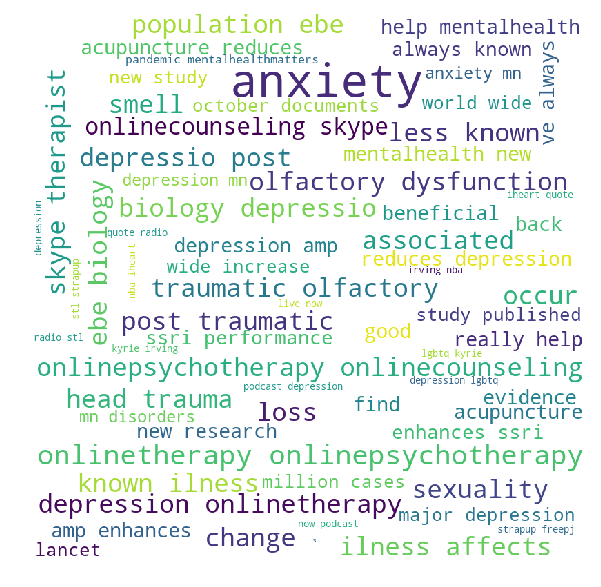

In [8]:
stopwords = set(STOPWORDS)

tweeets = ''

for val in tweets_corpus:

    tokens = val.split()
     
    tweeets += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tweeets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Introduce the model tweets based on DSM-5

In [9]:
# model tweets based on DSM-5

model_tweet_diagnosis = ["Major Depressive Episode is diagnosed after two weeks of depressed mood, diminished joy, sudden weight gain or loss, insomnia or hypersomnia, fatigue or loss of energy, feelings of guilt, worthlessness or suicide."]
model_tweet_experience = ["Loss of interest or pleasure along with appetite changes, at least to some degree. Individuals may report feeling less interested in hobbies, 'not caring anymore,' or not feeling any enjoyment in activities that were previously considered pleasurable."]
model_tweet_impact = ["Depression is a high mortality disorder. In other ways, depressed people have difficulties functioning well in normal life, and they struggle with sustaining friendships and relationships, financial security, and taking care of their health."]
model_tweet_stats = ["Depression can appear at any age, but usually the most affected population are young adults. Across all ages, females are affected more than males. The comorbidity with anxiety is at high rates."]
model_tweet_treatment = ["Medications and psychotherapy are effective for most people with depression. Recently, meditation and mindfulness have shown to help with reduces signs of depression."]


print(model_tweet_diagnosis)
print('')
print(model_tweet_experience)
print('')
print(model_tweet_impact)
print('')
print(model_tweet_stats)
print('')
print(model_tweet_treatment)

['Major Depressive Episode is diagnosed after two weeks of depressed mood, diminished joy, sudden weight gain or loss, insomnia or hypersomnia, fatigue or loss of energy, feelings of guilt, worthlessness or suicide.']

["Loss of interest or pleasure along with appetite changes, at least to some degree. Individuals may report feeling less interested in hobbies, 'not caring anymore,' or not feeling any enjoyment in activities that were previously considered pleasurable."]

['Depression is a high mortality disorder. In other ways, depressed people have difficulties functioning well in normal life, and they struggle with sustaining friendships and relationships, financial security, and taking care of their health.']

['Depression can appear at any age, but usually the most affected population are young adults. Across all ages, females are affected more than males. The comorbidity with anxiety is at high rates.']

['Medications and psychotherapy are effective for most people with depression

### Clean the model tweets

In [10]:
# clean the tweets

model_tweet_diagnosis = [clean_tweet(model_tweet_diagnosis[0])]
model_tweet_experience =  [clean_tweet(model_tweet_experience[0])]
model_tweet_impact = [clean_tweet(model_tweet_impact[0])]
model_tweet_stats = [clean_tweet(model_tweet_stats[0])]
model_tweet_treatment = [clean_tweet(model_tweet_treatment[0])]

In [11]:
# see an example of model tweet after cleaning
model_tweet_diagnosis

['major depressive episode is diagnosed after two weeks of depressed mood diminished joy sudden weight gain or loss insomnia or hypersomnia fatigue or loss of energy feelings of guilt worthlessness or suicide ']

### Encode the tweets into tensor embeddings (vector)

In [12]:
# encode model tweets
model_tweet_1 = model.encode(model_tweet_diagnosis, convert_to_tensor=True)
model_tweet_2 = model.encode(model_tweet_experience, convert_to_tensor=True)
model_tweet_3 = model.encode(model_tweet_impact, convert_to_tensor=True)
model_tweet_4 = model.encode(model_tweet_stats, convert_to_tensor=True)
model_tweet_5 = model.encode(model_tweet_treatment, convert_to_tensor=True)

The encoding of original tweets takes about 7-8 minutes, due to the big number of data points

In [13]:
# encode list of sentences to get their embeddings
tweets = model.encode(tweets_corpus, convert_to_tensor=True)

In [14]:
# see a tweet after encoding
tweets[0]

tensor([-0.1680,  0.2359, -0.8739,  ...,  1.4105, -0.2165,  0.9490],
       device='cuda:0')

### Compute Similarity Scores between each original tweet vs model tweet

In [15]:
def similarity(tweets, model_tweet):
    '''
    Computes the cosine similarity betweent two sentences.
    
    Input:
    -----------------------------------------------------
    tweets (list of tensors): all tweets encoded
    model_tweet (tensor): model tweets encoded
    
    Output:
    -----------------------------------------------------
    similarity_score(float): cosine similarity
    '''
    similarity_scores = []
    cosine_scores = util.pytorch_cos_sim(tweets, model_tweet)
    
    for i in range(len(tweets)):
        for j in range(len(model_tweet)):
            similarity = cosine_scores[i][j].item()
            similarity_scores.append(similarity)

    return similarity_scores

### Add similarity scores to the dataset

In [16]:
data['Similarity Score: Diagnosis'] = similarity(tweets, model_tweet_1)

In [17]:
data['Similarity Score: Experience'] = similarity(tweets, model_tweet_2)

In [18]:
data['Similarity Score: Impact'] = similarity(tweets, model_tweet_3)

In [19]:
data['Similarity Score: Stats'] = similarity(tweets, model_tweet_4)

In [20]:
data['Similarity Score: Treatment'] = similarity(tweets, model_tweet_5)

### Choose the most similar category for each tweet

In [21]:
most_similar = []
categories = ['Diagnosis', 'Experience', 'Impact','Stats', 'Treatment']

for i in range(len(data)):
    similarities = list(data.loc[i][8:13])
    maximum = max(similarities)
    most_similar.append(categories[similarities.index(maximum)])

In [22]:
data['Most Similar'] = most_similar

In [23]:
data['Most Similar'].describe()

count         16733
unique            5
top       Treatment
freq          10282
Name: Most Similar, dtype: object

In [24]:
data.head()

,user_ID,followers_count,user_location,user_description,date,text,hashtags,clean_tweet,Similarity Score: Diagnosis,Similarity Score: Experience,Similarity Score: Impact,Similarity Score: Stats,Similarity Score: Treatment,Most Similar
0,1.390000e+18,53,"Barcelona, Spain","For 34 years, Psych Congress has served as a u...",10/27/2021 11:45,Extended abstract submission deadline is TODAY...,NaN,extended abstract submission deadline is today...,0.106304,0.102706,0.165421,0.091614,0.228166,Treatment
1,2.350451e+09,30626,"Sacramento, California",Believer in creating a healthy game plan to fe...,10/27/2021 11:39,"🌟This Fall and if you can, intentionally spend...",['anxiety'],this fall and if you can intentionally spend m...,0.315031,0.462558,0.337896,0.276950,0.478721,Treatment
2,3.345540e+09,829,"Pittsburgh, PA","Founder Motivation Champs, Publisher 📚, Screen...",10/27/2021 11:38,Proud to welcome Stephanie Kunkel to the Motiv...,NaN,proud to welcome stephanie kunkel to the motiv...,0.148163,0.191013,0.195974,0.264201,0.330382,Treatment
3,1.174093e+07,3089,"Toronto, Canada",Self healing journey from ✝️ trauma to spiritu...,10/27/2021 11:35,How much energy do you put into keeping up app...,['travelblogger'],how much energy do you put into keeping up app...,0.254770,0.152889,0.226034,0.206349,0.311685,Treatment
4,4.008473e+09,417,"London, England",rTMS treatment across the UK and Ireland.\r\r\...,10/27/2021 11:35,Did you know that we treat seasonal affective ...,"['seasonalaffectivedisorder', 'SAD']",did you know that we treat seasonal affective ...,0.410407,0.471870,0.496885,0.154616,0.562274,Treatment


In [25]:
data['Most Similar'].value_counts()

Treatment     10282
Experience     3647
Diagnosis      1988
Impact          591
Stats           225
Name: Most Similar, dtype: int64

### Plots

In [26]:
counts =  list(data['Most Similar'].value_counts())

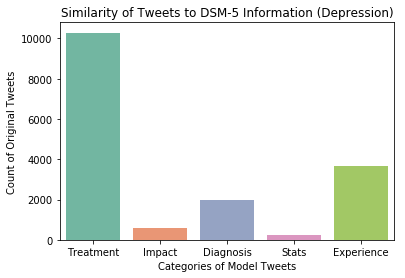

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# count plot on single categorical variable
p = sns.countplot(x ='Most Similar', data = data, palette = "Set2")
p.set_xlabel('Categories of Model Tweets')
p.set_ylabel('Count of Original Tweets')

p.set_title('Similarity of Tweets to DSM-5 Information (Depression)')
 
# show the plot
plt.show()

In [28]:
treatment_filter = data[data['Most Similar']=='Treatment']
treatment_max = max(list(treatment_filter['Similarity Score: Treatment']))

In [29]:
diagnosis_filter = data[data['Most Similar']=='Diagnosis']
diagnosis_max = max(list(treatment_filter['Similarity Score: Diagnosis']))


In [30]:
experience_filter = data[data['Most Similar']=='Experience']
experience_max = max(list(treatment_filter['Similarity Score: Experience']))

In [31]:
impact_filter = data[data['Most Similar']=='Impact']
impact_max = max(list(treatment_filter['Similarity Score: Impact']))

In [32]:
stats_filter = data[data['Most Similar']=='Stats']
stats_max = max(list(treatment_filter['Similarity Score: Stats']))

In [33]:
maxes = [diagnosis_max, experience_max,impact_max,stats_max, treatment_max]

Text(0.5,1,'Highest Similarity Scores per Category (Depression)')

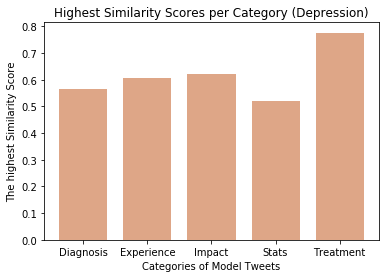

In [34]:
plt.bar(categories, maxes, color ='#dea687',
        width = 0.75)
plt.xlabel('Categories of Model Tweets')
plt.ylabel('The highest Similarity Score')
plt.title('Highest Similarity Scores per Category (Depression)')

C:\Users\almag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Tweet Counts')

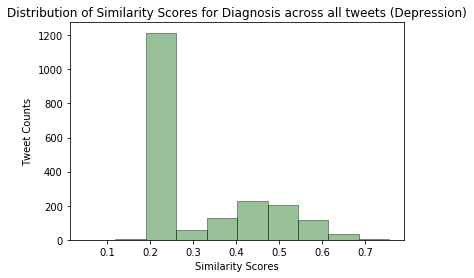

In [35]:
# seaborn histogram
sns.distplot(diagnosis_filter['Similarity Score: Diagnosis'], hist=True, kde=False, 
             bins=10, color = 'darkgreen',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Diagnosis across all tweets (Depression)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

C:\Users\almag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Tweet Counts')

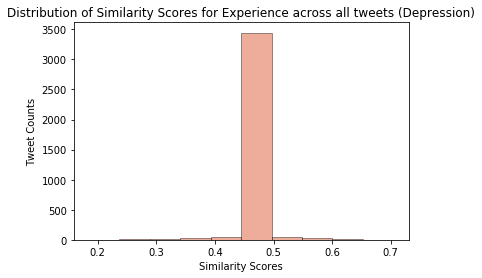

In [36]:
# seaborn histogram
sns.distplot(experience_filter['Similarity Score: Experience'], hist=True, kde=False, 
             bins=10, color = '#d63006',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Experience across all tweets (Depression)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

C:\Users\almag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Tweet Counts')

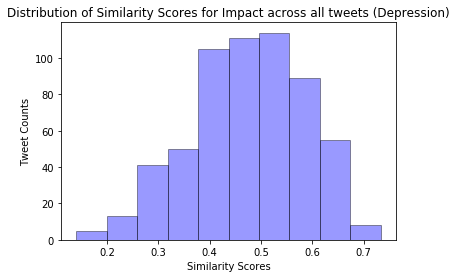

In [37]:
# seaborn histogram
sns.distplot(impact_filter['Similarity Score: Impact'], hist=True, kde=False, 
             bins=10, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Impact across all tweets (Depression)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

C:\Users\almag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Tweet Counts')

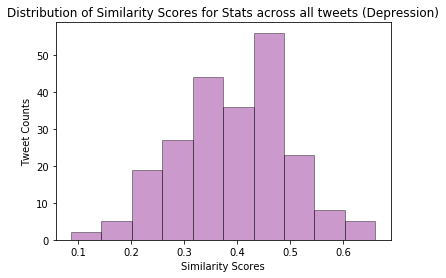

In [38]:
# seaborn histogram
sns.distplot(stats_filter['Similarity Score: Stats'], hist=True, kde=False, 
             bins=10, color = 'purple',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Stats across all tweets (Depression)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

C:\Users\almag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Tweet Counts')

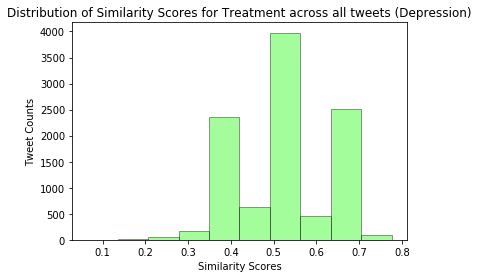

In [39]:
# seaborn histogram
sns.distplot(treatment_filter['Similarity Score: Treatment'], hist=True, kde=False, 
             bins=10, color = '#1afa05',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Similarity Scores for Treatment across all tweets (Depression)')
plt.xlabel('Similarity Scores')
plt.ylabel('Tweet Counts')

In [40]:
data.to_csv('Depression with sS scores.csv')